# [튜토리얼] SHP파일을 이용한 하천제방 피해위치 시각화

## 1. 활용 데이터
  - 데이터 출처 : 공공데이터 포털 : 한국국토정보공사_침수흔적정보 침수파제위치
  
## 2. SHP파일
  - 공간정보의 도형정보와 속성정보를 저장하는 파일 포맷
  
## 3. Tutoral 주요 내용
  - SHP파일 읽기
  - 좌표 변환
  - Folium을 이용한 포인트 시각화 


In [ ]:
# 라이브러리 import
import pandas as pd
import numpy as np
import pyproj
import folium
import geopandas as gpd

In [ ]:
# shp파일 경로 설정
path = './data'

## Step1. SHP파일 읽기

In [ ]:
# geopandas로 shp파일 읽기
geo_df = gpd.read_file(path + 'FL_CHIMPP.shp')
geo_df

,ADM_CD,DAT_SEQ,F_YR,geometry
0,4183039529,32556,2011,POINT (252431.766 436346.484)
1,4183039529,32556,2011,POINT (252512.576 436421.792)
2,4183039529,32556,2011,POINT (252563.417 436904.943)
3,4183039529,32556,2011,POINT (252606.791 436573.077)
4,4183039529,32556,2011,POINT (252609.694 436572.225)
5,4183039529,32556,2011,POINT (252823.956 436855.821)
6,4183039529,32556,2011,POINT (253068.781 436914.581)
7,4183039530,32557,2011,POINT (255681.730 439098.800)
8,4719025038,32584,2012,POINT (311851.731 301082.577)
9,4183039529,32556,2011,POINT (252311.491 436867.430)


In [ ]:
# CRS(Coordinate Reference Systems) 확인
geo_df.crs

<Projected CRS: PROJCS["TM_CENTRAL",GEOGCS["Korean 1985",DATUM["Ko ...>
Name: TM_CENTRAL
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Korean Datum 1985
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

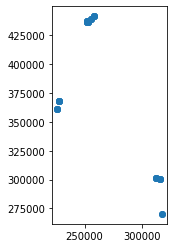

In [ ]:
# plot으로 시각화
geo_df.plot()

## Step2. 좌표 변환

In [ ]:
# geometry를 pandas의 x, y컬럼으로 분리
point_df = pd.DataFrame({
    'x': geo_df.geometry.x,
    'y': geo_df.geometry.y,
})
point_df

,x,y
0,252431.765991,436346.484009
1,252512.575989,436421.791992
2,252563.416992,436904.942627
3,252606.791016,436573.077026
4,252609.694031,436572.225037
5,252823.956421,436855.820801
6,253068.780823,436914.581421
7,255681.730225,439098.800232
8,311851.730835,301082.577393
9,252311.491028,436867.429626


In [ ]:
# 좌표계 변환 함수
# - coord: x, y 좌표 정보가 담긴 NumPy Array
# - p1_type: 입력 좌표계 정보 ex) epsg:5179
# - p2_type: 출력 좌표계 정보 ex) epsg:4326
def project_array(coord, p1_type, p2_type):
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [ ]:
# DataFrame -> NumPy Array 변환
coord = np.array(point_df)
coord

array([[252431.76599121, 436346.48400879],
       [252512.57598877, 436421.79199219],
       [252563.41699219, 436904.94262695],
       [252606.79101562, 436573.07702637],
       [252609.69403076, 436572.22503662],
       [252823.9564209 , 436855.82080078],
       [253068.78082275, 436914.5814209 ],
       [255681.73022461, 439098.80023193],
       [311851.73083496, 301082.57739258],
       [252311.49102783, 436867.42962646],
       [252683.79498291, 436666.81103516],
       [252739.7947998 , 436985.16638184],
       [317170.68341064, 270312.79058838],
       [258251.44104004, 441102.04962158],
       [311901.00982666, 301106.77423096],
       [314999.5881958 , 300512.18463135],
       [252463.83599854, 436370.08203125],
       [258240.78198242, 441137.90698242],
       [314972.15344238, 300586.69940186],
       [252324.76342773, 436898.97021484],
       [252501.77001953, 436405.69000244],
       [252564.73022461, 436915.66461182],
       [252756.90081787, 437018.14263916],
       [252

In [ ]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(coord, p1_type, p2_type)
result

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD f

array([[127.58541163,  36.52397608],
       [127.58631896,  36.52465025],
       [127.58691948,  36.52900116],
       [127.58738116,  36.52600832],
       [127.58741351,  36.52600048],
       [127.58982515,  36.52854417],
       [127.59256273,  36.52906012],
       [127.62189485,  36.54859358],
       [128.22973497,  35.30009925],
       [127.58410409,  36.52867694],
       [127.5882473 ,  36.52684872],
       [127.58889429,  36.52971436],
       [128.28383547,  35.02221424],
       [127.650745  ,  36.56649156],
       [128.23027995,  35.30031179],
       [128.2642562 ,  35.29460252],
       [127.58577128,  36.52418696],
       [127.65062864,  36.56681531],
       [128.2639651 ,  35.29527714],
       [127.58425441,  36.52896043],
       [127.58619722,  36.52450575],
       [127.58693488,  36.52909771],
       [127.58908754,  36.53001057],
       [127.59159659,  36.52887423],
       [127.62185234,  36.54872188],
       [128.23078108,  35.30111607],
       [128.26385754,  35.29474476],
 

In [ ]:
# 변환된 좌표계를 각각 위도 및 경도로 할당
geo_df['lon'] = result[:, 0]
geo_df['lat'] = result[:, 1]

In [ ]:
geo_df

,ADM_CD,DAT_SEQ,F_YR,geometry,lon,lat
0,4183039529,32556,2011,POINT (252431.766 436346.484),127.585412,36.523976
1,4183039529,32556,2011,POINT (252512.576 436421.792),127.586319,36.524650
2,4183039529,32556,2011,POINT (252563.417 436904.943),127.586919,36.529001
3,4183039529,32556,2011,POINT (252606.791 436573.077),127.587381,36.526008
4,4183039529,32556,2011,POINT (252609.694 436572.225),127.587414,36.526000
5,4183039529,32556,2011,POINT (252823.956 436855.821),127.589825,36.528544
6,4183039529,32556,2011,POINT (253068.781 436914.581),127.592563,36.529060
7,4183039530,32557,2011,POINT (255681.730 439098.800),127.621895,36.548594
8,4719025038,32584,2012,POINT (311851.731 301082.577),128.229735,35.300099
9,4183039529,32556,2011,POINT (252311.491 436867.430),127.584104,36.528677


## Step3. Folium을 이용한 포인트 시각화

In [ ]:
# 포인트 지도 시각화
import folium

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = geo_df['lat'].mean()
lon = geo_df['lon'].mean()

m = folium.Map([lat,lon],zoom_start=9)

for i in geo_df.index:
    sub_lat = geo_df.loc[i,'lat']
    sub_lon = geo_df.loc[i,'lon']

    if (np.isnan(sub_lat) == False) & (np.isnan(sub_lat) == False) :
      title = geo_df.loc[i,'F_YR'] 
      folium.Marker([sub_lat,sub_lon],tooltip = title).add_to(m)
m

In [ ]:
# 포인트 클러스터 지도 시각화
import folium
from folium.plugins import MarkerCluster

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = geo_df['lat'].mean()
lon = geo_df['lon'].mean()

m = folium.Map([lat,lon],zoom_start=9)

mc = MarkerCluster()
for i in geo_df.index:
    mc.add_child(folium.Marker(location = [geo_df.loc[i,'lat'], geo_df.loc[i,'lon']], popup=geo_df.loc[i,'F_YR']))
m.add_child(mc)
m
